In [1]:
from game import HexState
from RL import RL_algorithm
from TOPP import TOPP, Agent
from ANN import ANN
from tree import Node
import random

In [ ]:
# TOPP parameters
games_to_be_played = 10
board_size = 4

# MCTS/RL parameters
episodes = 100
simulations = 500
training_batch_size = 1000
ann_save_interval = 10
eps = 1
eps_decay = 0.95

# ANN parameters
activation_functions = ["linear", "sigmoid", "tanh", "relu"]
optimizers = ["Adagrad", "SGD", "RMSprop", "Adam"]
alpha = 0.01 # learning rate
hidden_layer_sizes = [16,16,16]
io_layer_size = board_size * board_size # input and output layer sizes (always equal)
activation_func = activation_functions[3]
optimizer = optimizers[2]
epochs = 10

model = ANN(io_layer_size, hidden_layer_sizes, None, alpha, epochs, activation_func, optimizer)
RL_algorithm(episodes, simulations, training_batch_size, board_size, ann_save_interval, model, eps, eps_decay)

 20%|██        | 20/100 [22:06:17<178:44:06, 8043.08s/it] 

In [3]:
def run_tournament(games, players):
    results = defaultdict(int)
    for player1 in players:
        for player2 in players:
            if player1 != player2:
                for _ in range(games):
                    result = play_game(player1, player2)
                    results[player1] += int(result)
                    results[player2] += int(not result)
        players.remove(player1)
    print(results)

def play_game(player1, player2, display = False):
    game = HexState(4)
    turn = random.choice([True,False])
    print("{} starts with red".format(player1 if turn else player2))
    while not game.is_game_over():
        game = player1.move(game) if turn else player2.move(game)
        if display: game.draw(1)
        turn = not turn
    return game, player2 if turn else player1

In [4]:
import tensorflow as tf
ann_0 = ANN(16, hidden_layer_sizes, 'models/level-0')
ann_5 = ANN(16, hidden_layer_sizes, 'models/level-5')
ann_10 = ANN(16, hidden_layer_sizes, 'models/level-10')
ann_15 = ANN(16, hidden_layer_sizes, 'models/level-15')
ann_20 = ANN(16, hidden_layer_sizes, 'models/level-20')

a1 = Agent(ann_0, 0)
a2 = Agent(ann_5, 5)
a3 = Agent(ann_10, 10)
a4 = Agent(ann_15, 15)
a5 = Agent(ann_20, 20)

ANN_level_15 and ANN_level_20 playing...
ANN_level_20 starts with red
ANN_level_20 won


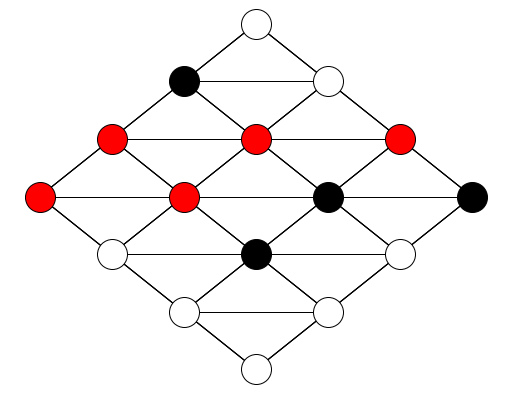

In [19]:
p1 = a4
p2 = a5
print(p1,"and",p2,"playing...")
state, winner = play_game(p1, p2, display = False)
print(winner, "won")
state.draw()